# Assignment 1 : XML to RDF Document 
* 제 2강의 Example #13을 RDF 형식으로 변환하시오.
    * 변환한 RDF 파일을 RDF Validator로 검증하고 캡쳐하여 RDF 파일과 캡쳐 이미지 파일을 제출하시오.
* 첨부한 '샘플편성표'를 보고 이를 표현하기 위한  RDF 파일을 작성하고 역시 검증 후 RDF 파일과 캡쳐 이미지 파일을 제출하시오.

* `총 4개(RDF 2개, 이미지파일 2개)를 제출하시오.`

# Set Up

## Imports

In [112]:
import rdflib
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.namespace import RDF, FOAF, XSD, NamespaceManager
from PIL import Image

import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# RDF 그래프 그려주는 거
import io
from io import StringIO, BytesIO
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [117]:
create_png

NameError: name 'create_png' is not defined

## Functions

In [120]:
def visualize(g, image_name):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png() # PNG 이미지를 생성함
    
    dg.write_png(image_name + '.png')
    
    display(Image(png)) # 이미지를 표시함

In [30]:
def make_class(class_name, base_URI:'Str'):
    
    URI = base_URI + class_name
    globals()['class_instance'] = rdflib.URIRef(URI)
    
    return class_instance

# Example 13

# 샘플편성표

In [128]:
URI = 'http://example.org/sample_schedule/'

In [129]:
property_list = ['채널', '지역', '일자', '시작시간', '종료시간', '대분류', '중분류', '프로그램']
channel_list = ['KBS', 'MBC'] # 채널 리스트
region_list = ['서울', '경기인천'] # 지역 리스트
date_list = ['Date_2022_03_01', 'Date_2022_03_02']
category = ['정보', '보도', '오락'] # 대분류
category_info = ['생활정보', '다큐멘터리', '정보종합'] # 정보 중분류
category_repo = ['뉴스'] # 보도 중분류
category_recr = ['토크쇼', '공연예술'] # 오락 중분류
program_list = ['생활의발견스페셜', '내고향스페셜', 'KBS뉴스광장1부', 'KBS뉴스광장2부', '인간극장', '아침마당', '코로나19통합뉴스룸', '생활의발견',
               '야생탐사프로젝트와일드맵플러스_재', '굿모닝대한민국라이브스페셜', '아침마당_재',  'KBS중계석_발렌타인콘서트']

In [130]:
total_list = [property_list, channel_list, region_list, date_list, category, category_info, category_repo, category_recr, program_list]

In [131]:
for sub_list in total_list:
    for i in sub_list:
        globals()[i] = make_class(i, URI)

In [132]:
샘플편성표 = make_class('샘플편성표', URI)

In [133]:
g = rdflib.Graph()

In [134]:
g.add((샘플편성표, 채널, KBS))
g.add((샘플편성표, 채널, MBC))

g.add((KBS, 지역, 서울))
g.add((MBC, 지역, 경기인천))

g.add((정보, 중분류, 생활정보))
g.add((정보, 중분류, 다큐멘터리))
g.add((정보, 중분류, 정보종합))

g.add((보도, 중분류, 뉴스))

g.add((오락, 중분류, 토크쇼))
g.add((오락, 중분류, 공연예술))

<Graph identifier=N6cfa1c860eaf4e28ab2b1093d3309424 (<class 'rdflib.graph.Graph'>)>

In [135]:
g.add((생활정보, 대분류, 정보))
g.add((다큐멘터리, 대분류, 정보))
g.add((정보종합, 대분류, 정보))

g.add((생활정보, 프로그램, 생활의발견스페셜))
g.add((생활정보, 프로그램, 내고향스페셜))
g.add((뉴스, 프로그램, KBS뉴스광장1부))
g.add((뉴스, 프로그램, KBS뉴스광장2부))
g.add((다큐멘터리, 프로그램, 인간극장))
g.add((토크쇼, 프로그램, 아침마당))
g.add((뉴스, 프로그램, 코로나19통합뉴스룸))
g.add((생활정보, 프로그램, 생활의발견))
g.add((다큐멘터리, 프로그램, 야생탐사프로젝트와일드맵플러스_재))
g.add((정보종합, 프로그램, 굿모닝대한민국라이브스페셜))
g.add((토크쇼, 프로그램, 아침마당_재))
g.add((공연예술, 프로그램, KBS중계석_발렌타인콘서트))

<Graph identifier=N6cfa1c860eaf4e28ab2b1093d3309424 (<class 'rdflib.graph.Graph'>)>

In [136]:
#### 프로그램 정보 :: KBS
g.add((생활의발견스페셜, 일자, Date_2022_03_01))
g.add((생활의발견스페셜, 시작시간, Literal('05:00:00')))
g.add((생활의발견스페셜, 종료시간, Literal('05:08:05')))

g.add((내고향스페셜, 일자, Date_2022_03_01))
g.add((내고향스페셜, 시작시간, Literal('05:09:41')))
g.add((내고향스페셜, 종료시간, Literal('05:58:20')))

<Graph identifier=N6cfa1c860eaf4e28ab2b1093d3309424 (<class 'rdflib.graph.Graph'>)>


(dot.exe:6656): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:6656): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:6656): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


(dot.exe:10236): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:10236): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:10236): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



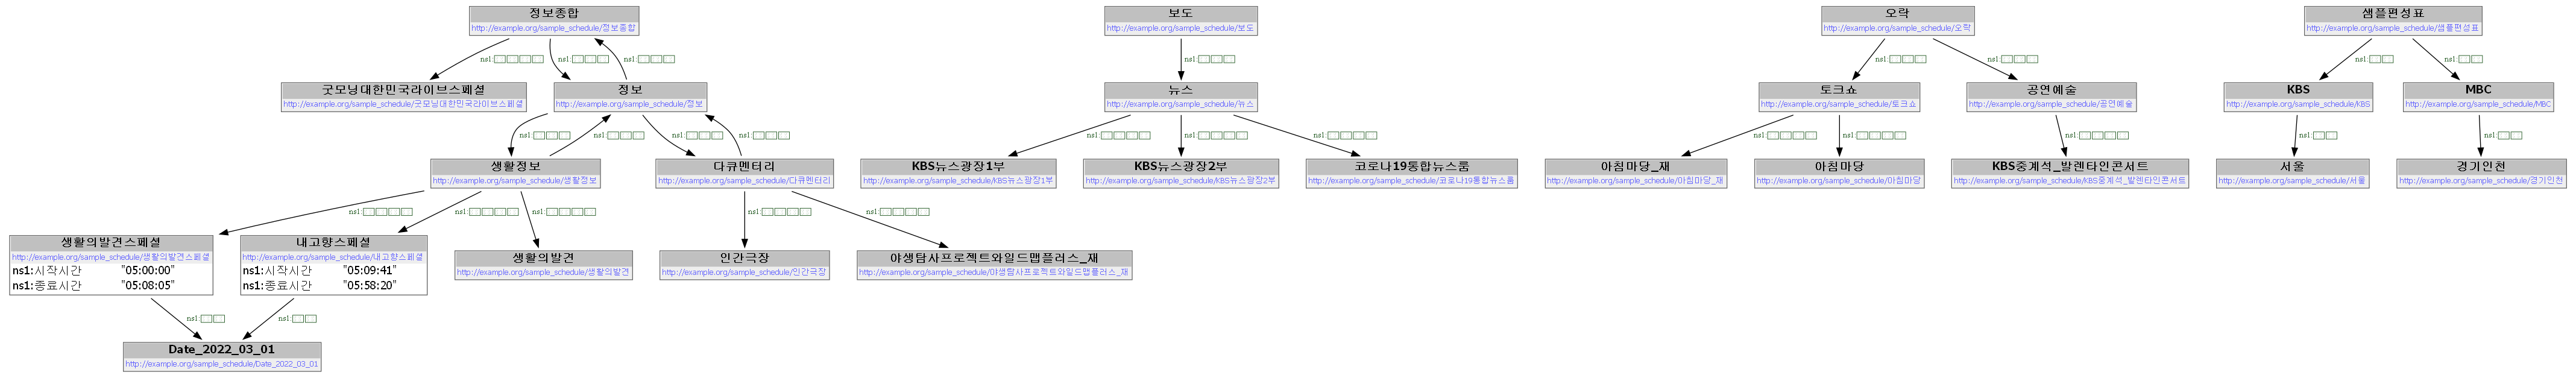

In [137]:
visualize(g, 'schedule')

#### 그래프를 RDF-XML로 만들어 저장하기

In [138]:
g.serialize('test.rdf', format = 'pretty-xml')

<Graph identifier=N6cfa1c860eaf4e28ab2b1093d3309424 (<class 'rdflib.graph.Graph'>)>

# 또다른예시

In [75]:
EX = Namespace('https://example.com/id/') 
UNIT = Namespace('http://qudt.org/2.1/vocab/unit/')
BS = Namespace('https://w3id.org/def/basicsemantics-owl#')

g = Graph()
g.namespace_manager = NamespaceManager(Graph())
g.namespace_manager.bind('unit', UNIT)
g.namespace_manager.bind('bs', BS)
g.namespace_manager.bind('ex', EX)

i = {
    "objectid_l1": "Bridge_1",
    "defid_l1": "Bridge",
    "objectid_l2": "Deck_1",
    "defid_l2": "Deck",
    "variable": "height",
    "value": "50.0",
    "unit": "M",
}

if i['objectid_l1'] != None:
    g.add((EX[i['objectid_l1']], RDF.type, EX[i['defid_l1']]))
    g.add((EX[i['objectid_l1']], BS['hasPart'], EX[i['objectid_l2']]))

    bnode = BNode()
    g.add((bnode, RDF.value, Literal(i['value'])))
    g.add((bnode, BS['unit'], UNIT[i['unit']]))
    g.add((EX[i['objectid_l1']], EX[i['variable']], bnode))

g.serialize('test.ttl', format='ttl')

<Graph identifier=N55964e476f4f4ec1a7ca8ee83b5709a9 (<class 'rdflib.graph.Graph'>)>


(dot.exe:7456): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:7456): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:7456): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



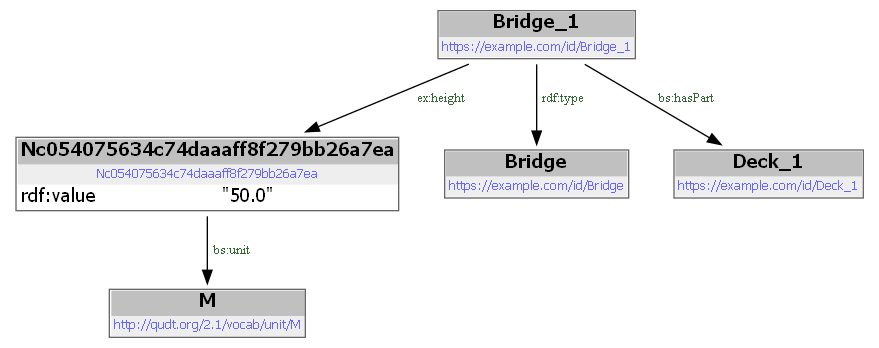

<Graph identifier=N55964e476f4f4ec1a7ca8ee83b5709a9 (<class 'rdflib.graph.Graph'>)>

In [76]:
visualize(g)
g.serialize('test2.rdf', format = 'pretty-xml')